## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  
А именно:  
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
- проанализировать основные признаки, наиболее сильно влияющие на отток;  
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
- 1) выделить целевые группы клиентов;
- 2) предложить меры по снижению оттока;
- 3) определить другие особенности взаимодействия с клиентами.

## Описание данных

**Набор данных включает следующие поля:**  
- 'Churn' — факт оттока в текущем месяце;

**Текущие поля в датасете:**  
Данные клиента за предыдущий до проверки факта оттока месяц:  
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**  
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.   

**Путь к файлу:**  
/datasets/gym_churn.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

**Шаг 2. Исследовательский анализ данных (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Переведем наименования столбцов в нижний регистр.

In [4]:
df.columns = df.columns.str.lower()
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [5]:
df.duplicated().sum()

0

Пропусков нет, дубликатов нет, данные готовы к анализу. 

**Шаг 2. Исследовательский анализ данных (EDA)**

Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В столбцах near_location, phone встречаются нулевые значения, непорядок, упуская эту информацию мы теряем возможности влияния на клиентов.

Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [7]:
df_churn = df.groupby('churn').agg('mean').T
df_churn

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


У клиентов из оттока многие средние значения признаков ниже, чем у тех клиентов, что продолжают заниматься.

Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

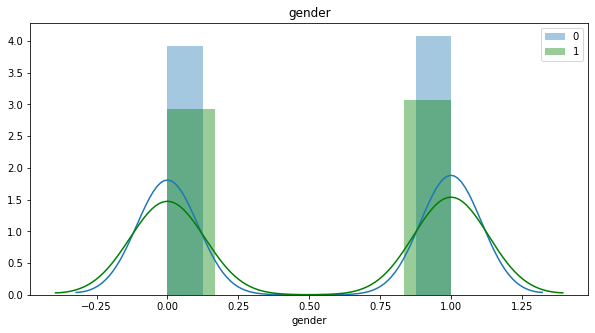

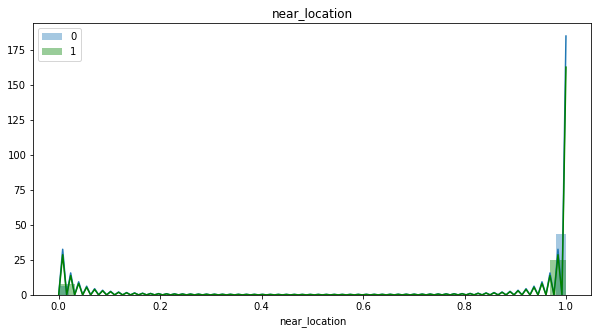

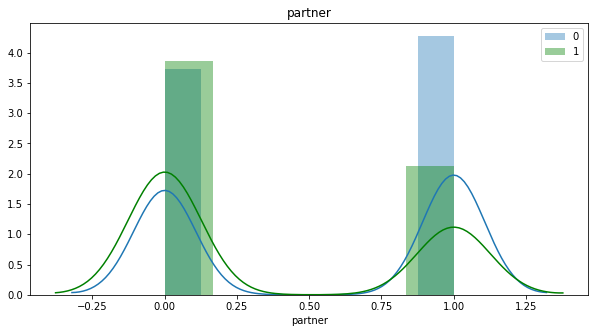

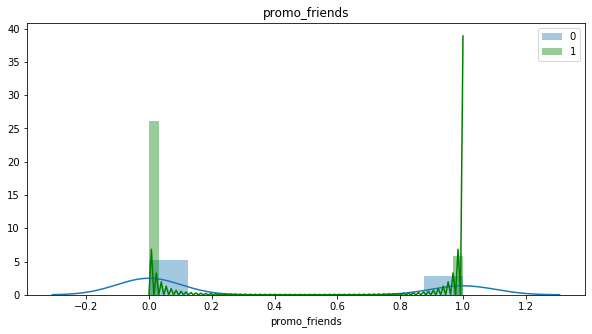

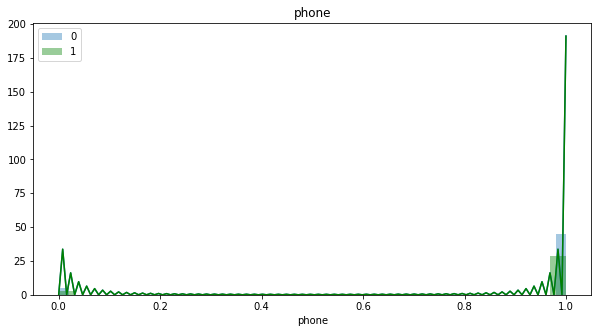

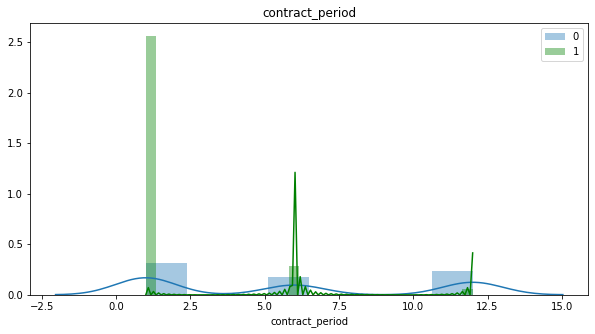

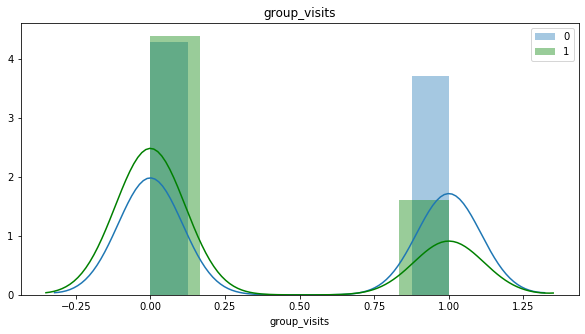

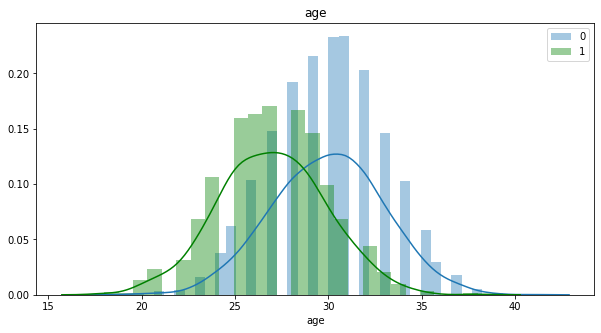

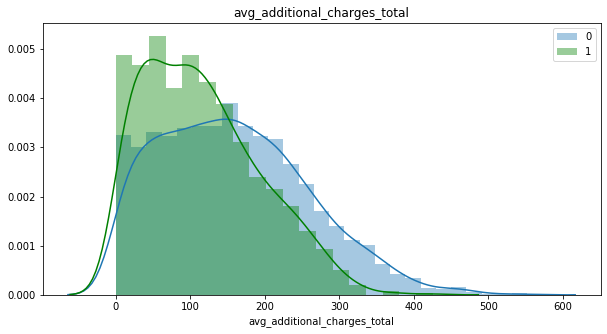

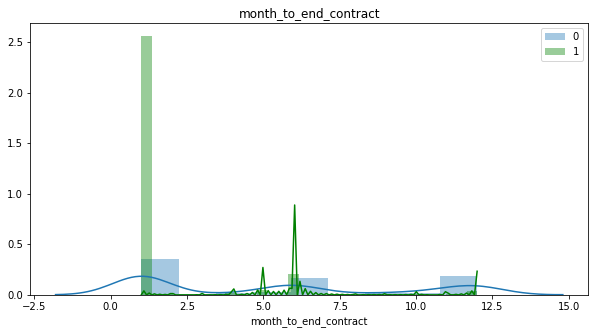

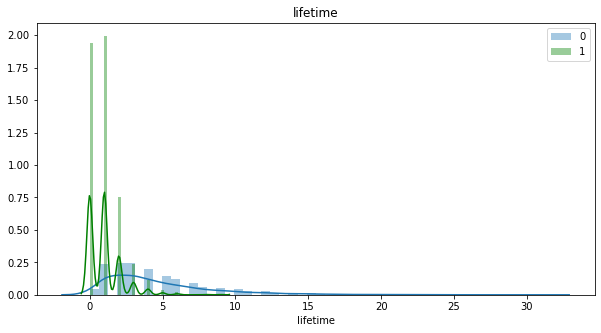

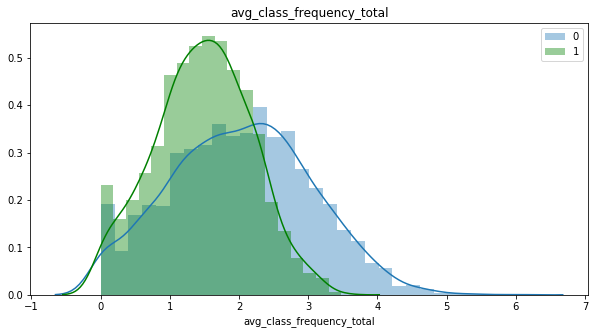

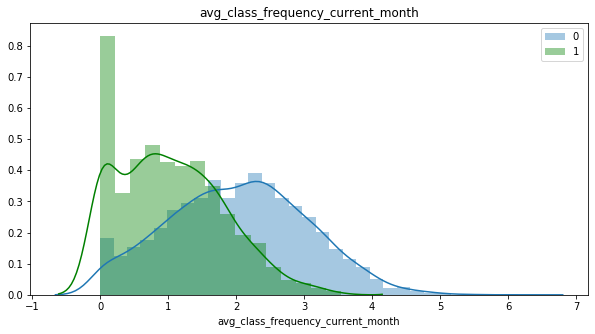

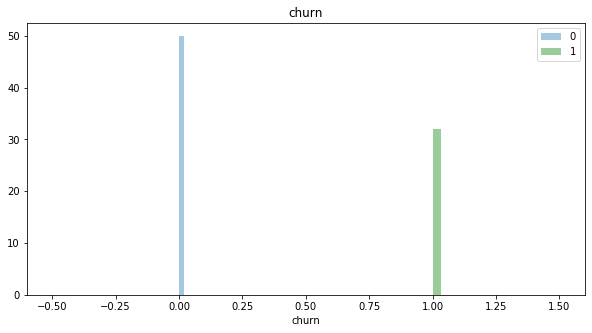

In [8]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df.query('churn == 0')[column])
    sns.distplot(df.query('churn == 1')[column], color = 'g')
    plt.legend(labels = ('0', '1'))
    plt.title(column)
    plt.show()

Более молодой возраст - фактор риска оттока, если клиент тратит деньги неактивно, значит интереса нет, он потенциальный отточник, если абонемент ограничен одним месяцем, человек прислушивается к себе, возникнет ли интерес, он также потенциальный отточник. Потенциальный отточник занимается пару раз в неделю.  Если клиент за месяц не посетил зал, то скорее всего он попадет в категорию оттока.

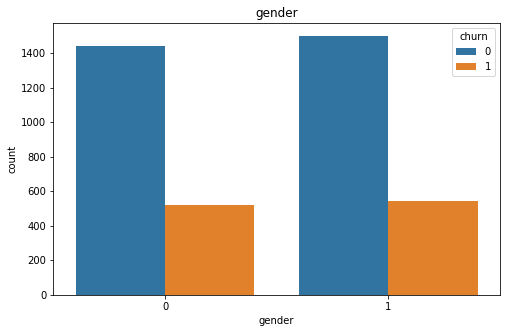

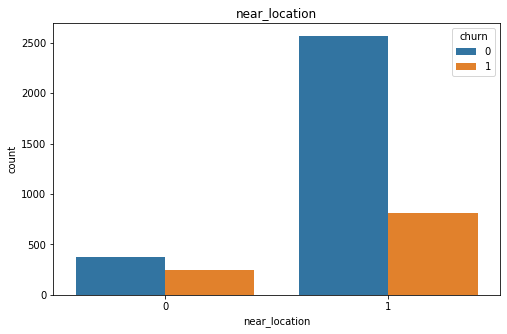

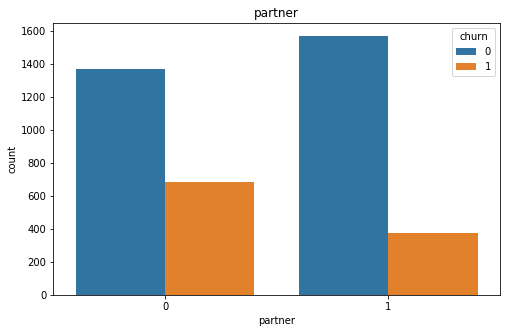

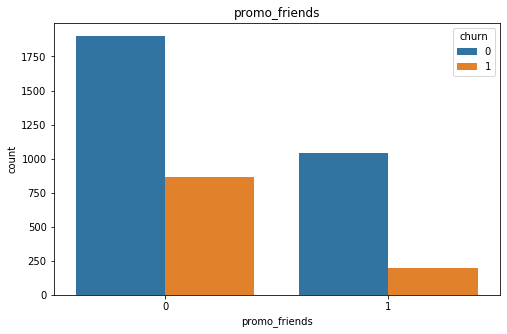

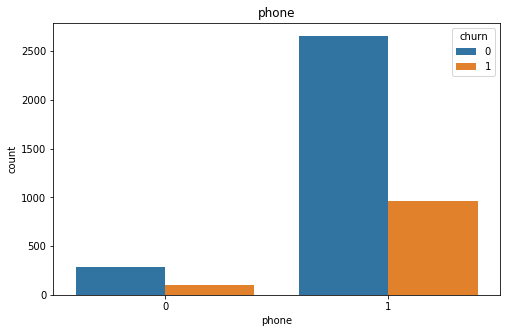

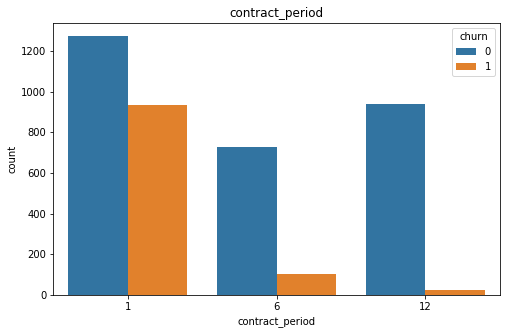

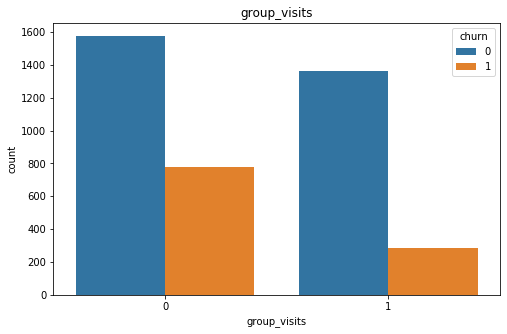

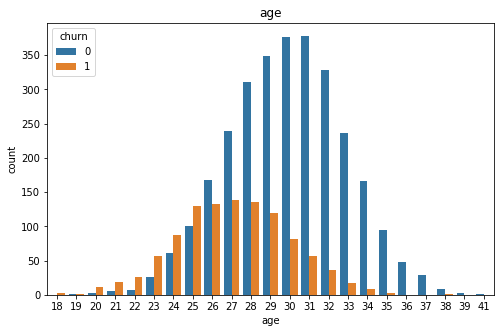

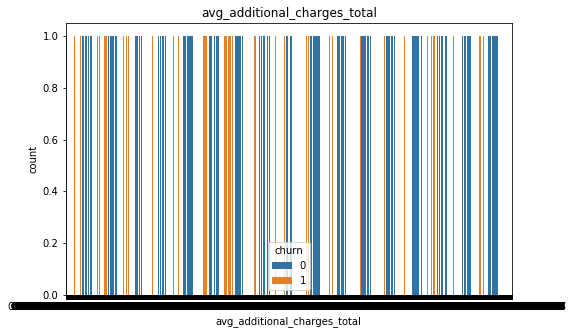

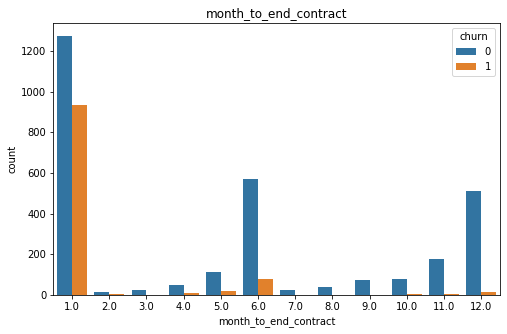

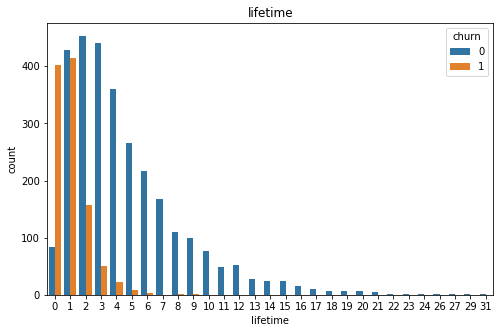

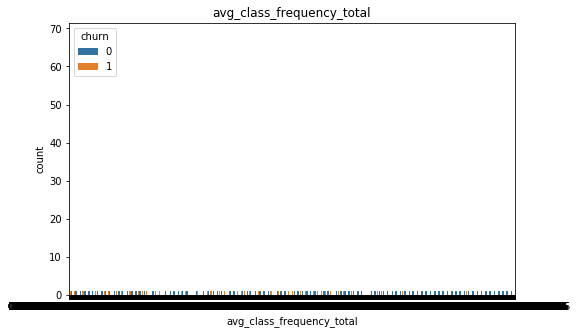

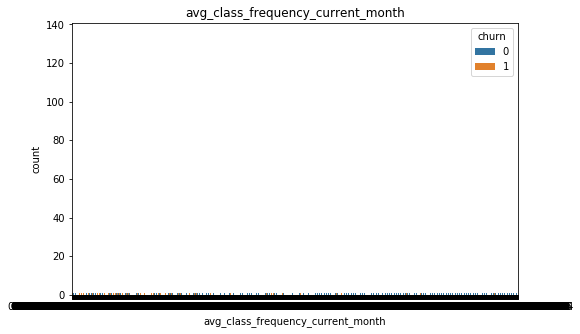

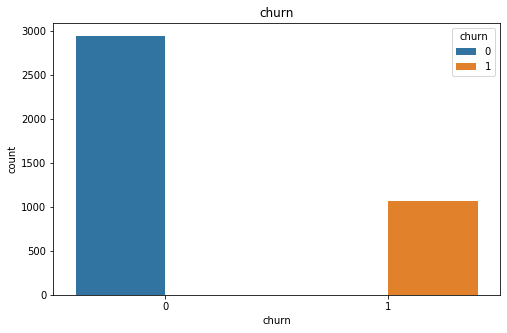

In [9]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

Можно заметить, что клиенты, склонные к оттоку покупают абонемент всего на один месяц, 
реже посещают групповые занятия

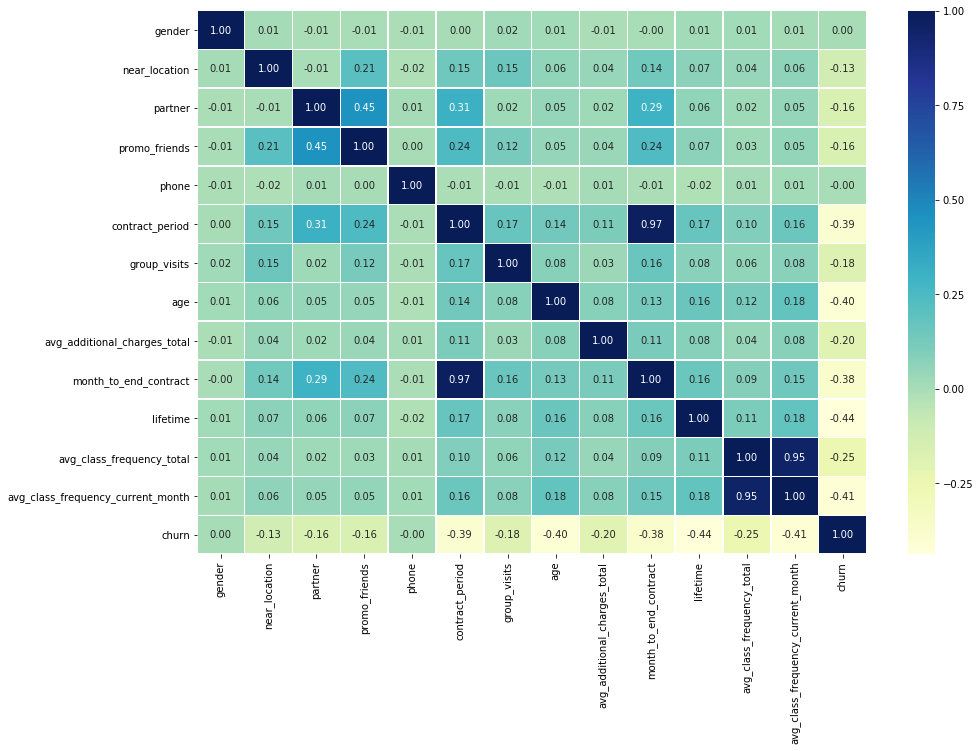

In [10]:
cm = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="YlGnBu")
plt.show()

Выделяются мультиколлинеарные признаки contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total; признаки с нулевой корреляцией с целевой переменной - phone и gender, а также признаки с отрицательной корреляцией.

In [11]:
#X_train = X_train.drop(['Avg_class_frequency_current_month', 'avg_class_frequency_total'], axis=1)

**Шаг 3. Постройте модель прогнозирования оттока клиентов**

In [12]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [13]:
#Логистическая регрессия

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


In [14]:
#Случайный лес

scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


модель линейной регресси лучше, чем модель случайного леса.

**Шаг 4. Сделайте кластеризацию клиентов**

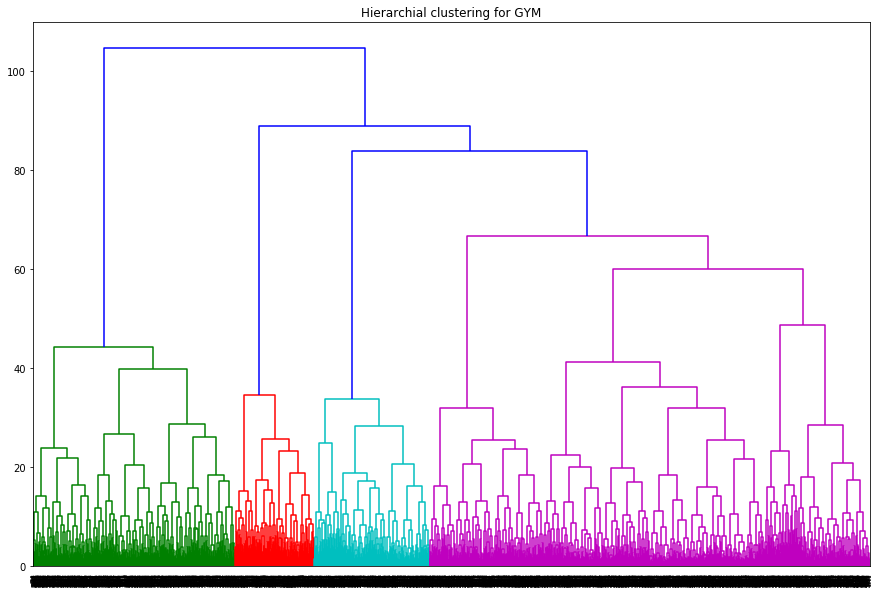

In [15]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Выделяются 5 кластеров.

In [16]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)
df_clust = df
df_clust['cluster'] = labels

Посмотрите на средние значения признаков для кластеров.

In [17]:
df_clust.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


В среднем слабее оттекают кластеры 0 и 4. Более активный отток из кластера 3.

Построим распределения признаков для кластеров.

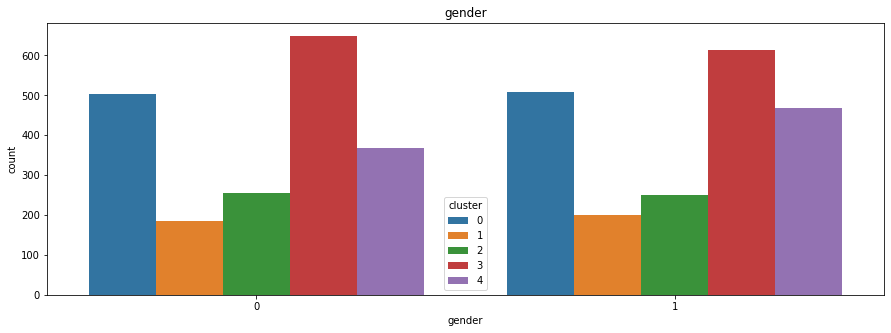

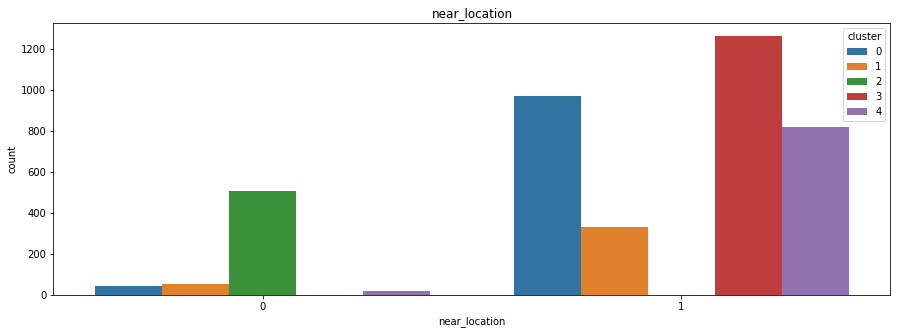

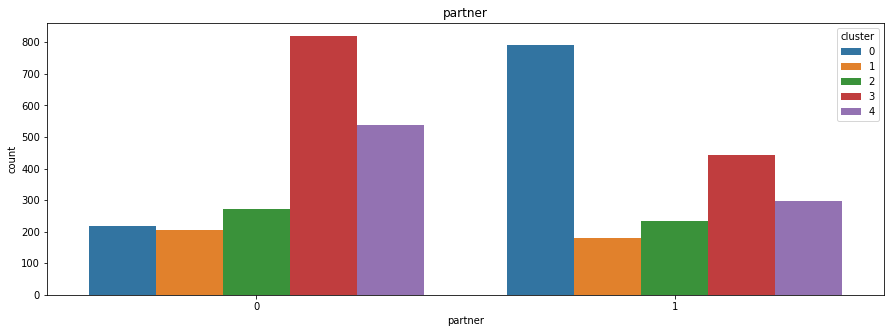

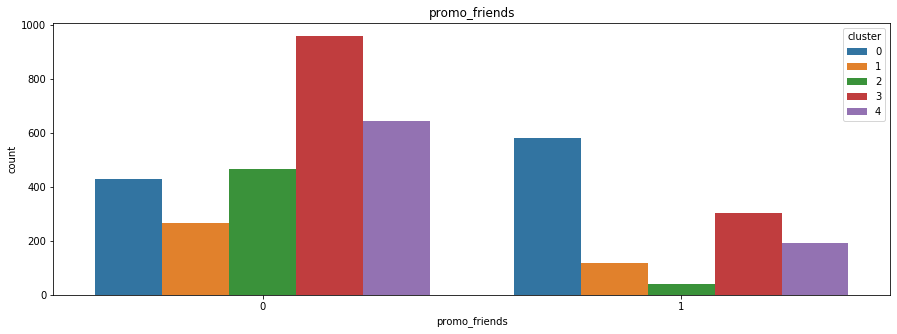

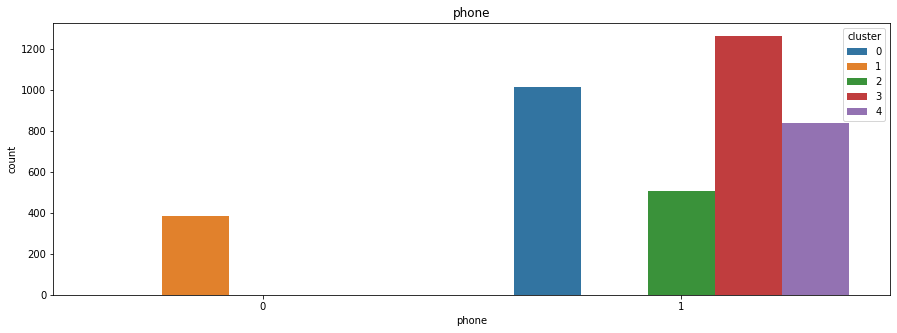

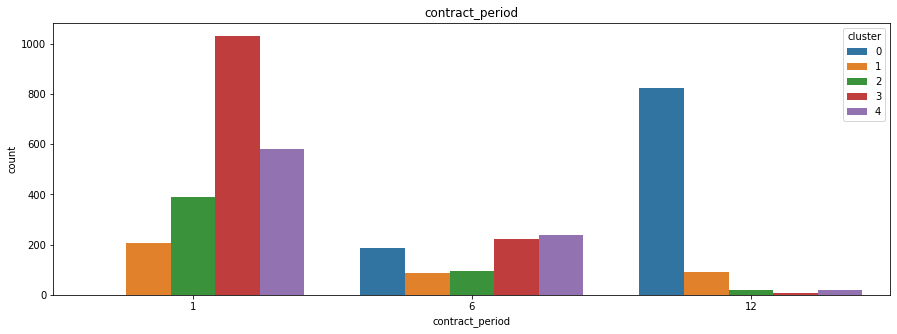

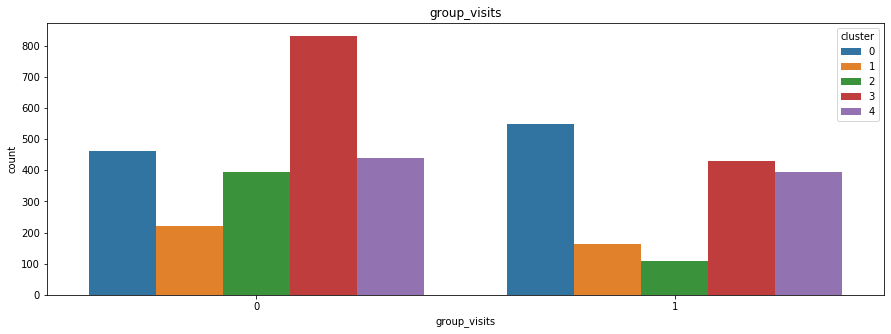

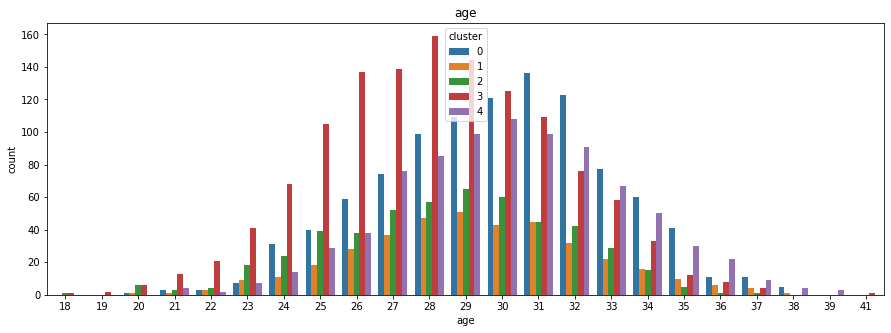

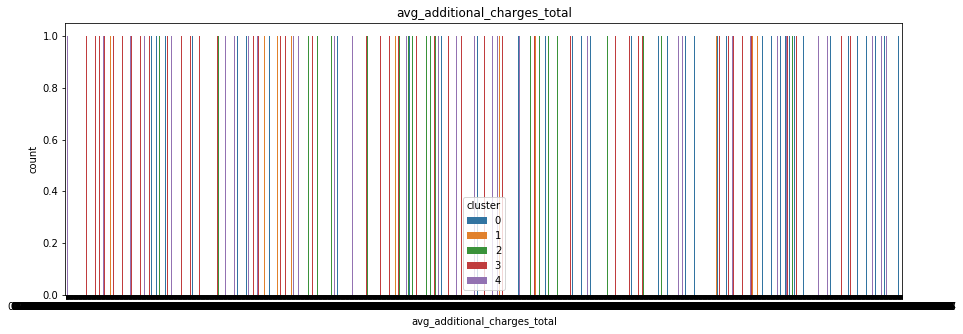

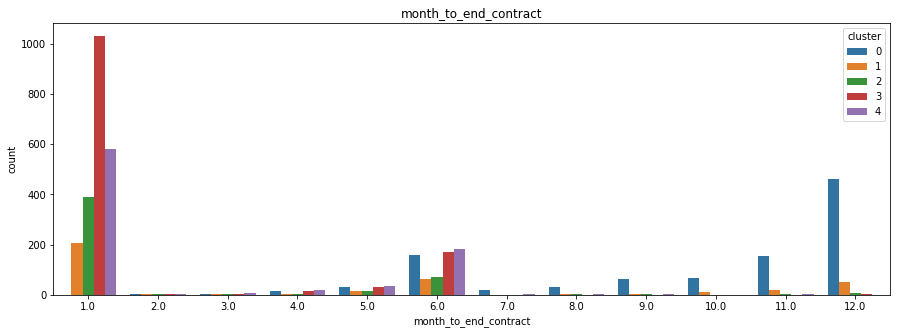

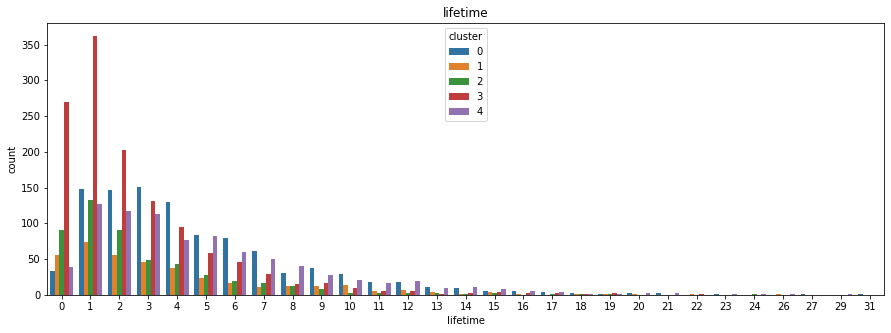

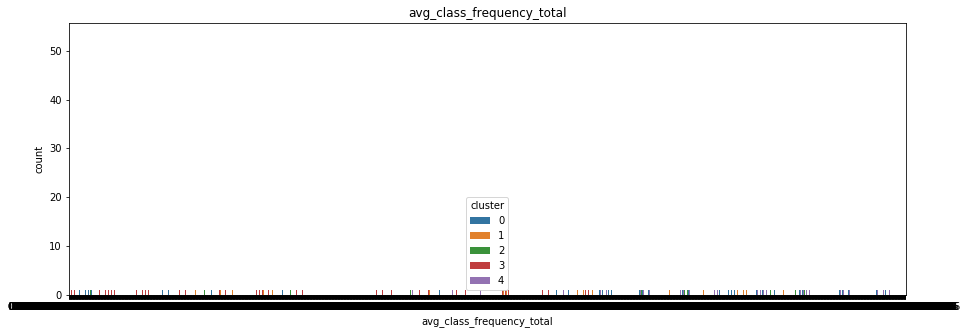

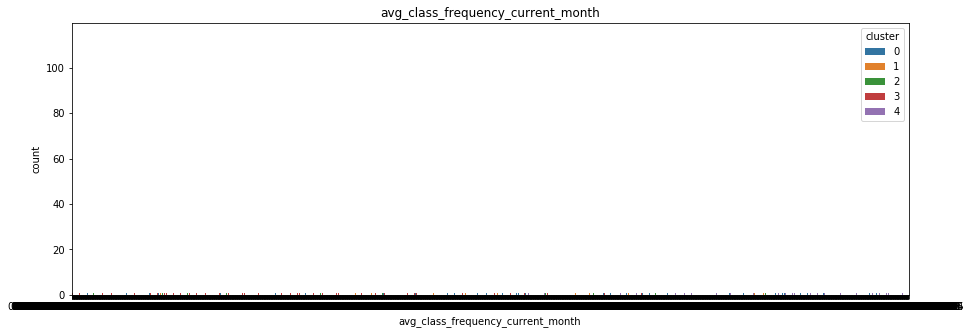

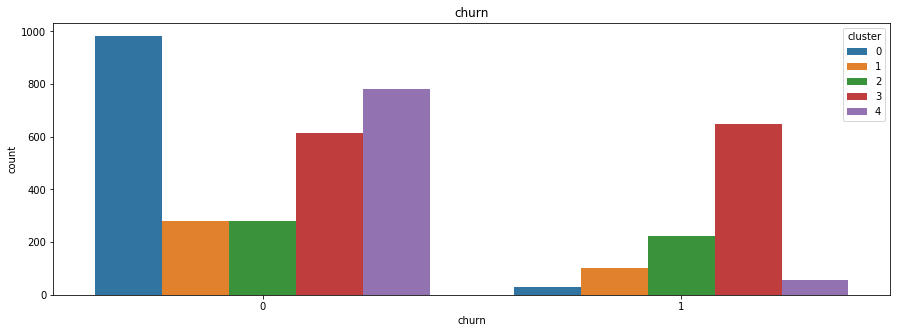

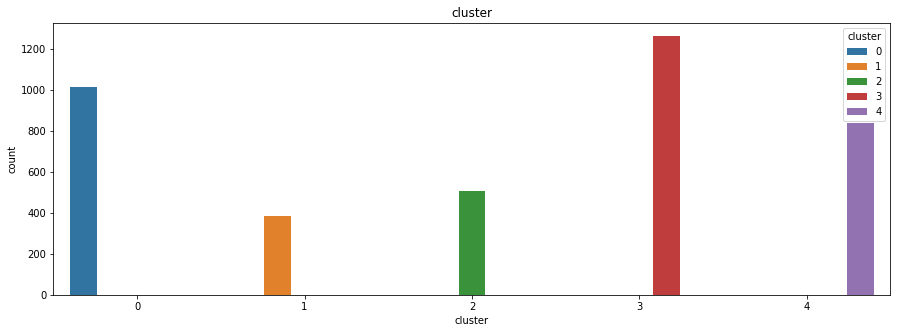

In [18]:
for column in df.columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

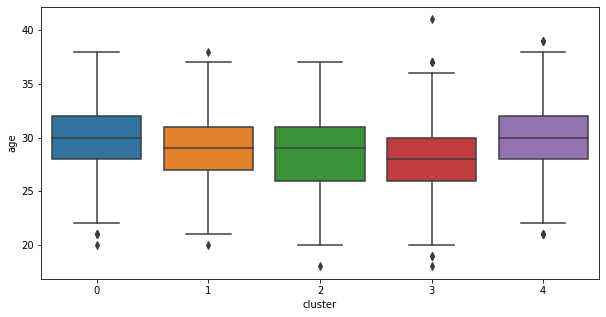

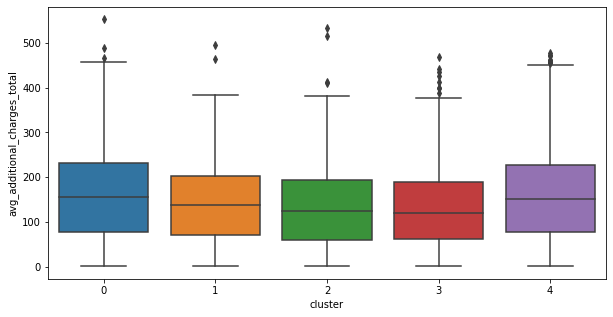

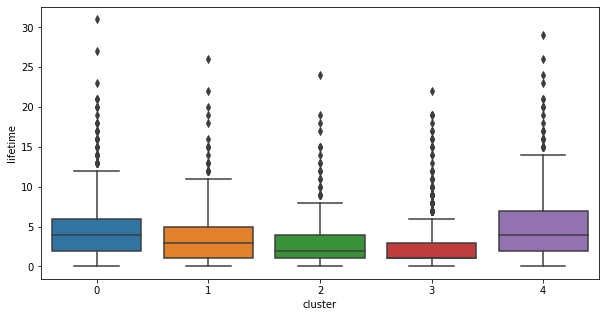

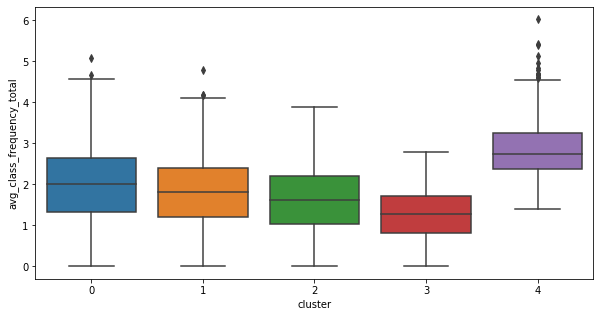

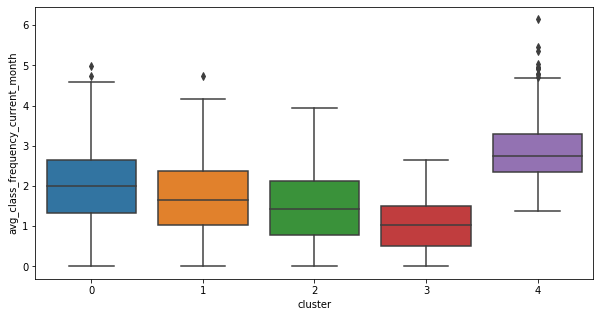

In [22]:
for column in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

Рассмотрим внимательнее графики со средними значениями посещений и выручки.

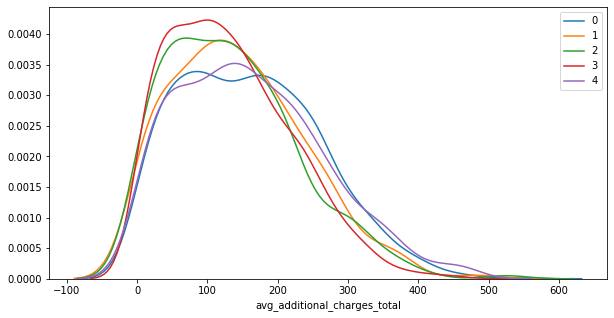

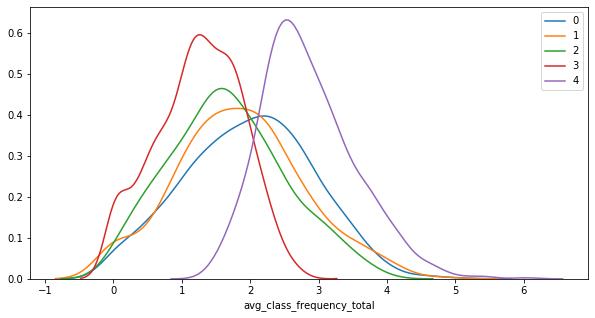

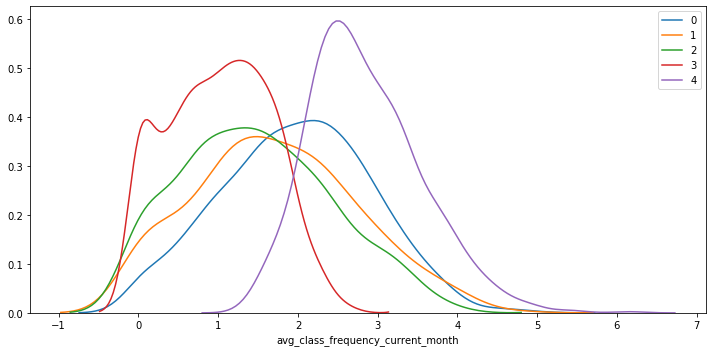

In [18]:
for column in ['avg_additional_charges_total',
               'avg_class_frequency_total',
               'avg_class_frequency_current_month']:
    plt.figure(figsize=(10, 5))
    for i in range(0,5):
        sns.distplot(df_clust.query('cluster == @i')[column],
                     hist=False,
                     kde_kws={'label':i})
plt.tight_layout()

Клиенты высокоотточного второго класса живут/работают в удалении от района фитнесс-центра, клиенты "хороших" 2-го и 4-го напротив, живут/работают в непосредственной близости. 0-й кластер - лидер по приходу клиентов по факту первоначальной записи в рамках акции «приведи друга», данная акция похоже имеет смысл. 3-й кластер антилидер по количеству клиентов - сотрудников компании-партнёра клуба, в 1-м кластере таких клиентов наибольшее количество. При этом клиенты 1-го кластера не оставляют номеров вовсе, это упущенные возможности для маркетологов. Длительнось текущего абонемента составляет 1 месяц у 3-го кластера и чаще - 1 год - у 0-го, у надежного 4-го кластера наиболее популярна 1-мес. длительность, и это при том, что эти клиенты вро как заточены на длительную дистанцию, возможно, годовое предложение не так выгодно, стоит обратить на это внимание. По времени с момента первого посещения - новые клиенты чаще склонны к оттоку. У 3-го кластера не популярны групповые занятия. Наиболее характерный представитель категории оттока - 28-летний представитель 3-го кластера, наиболее надежный клиент - представитель 0-го кластера 32 лет, 4-го кластера 30 лет. Срок до окончания текущего действующего абонемента, тут с 1-мес. сроком лидирует 3 кластер, с годовым - 0-й.  
Касательно 'Avg_class_frequency_total'(средняя частота посещений в неделю за все время с начала действия абонемента) - Самый активный - 4-й кластер минимальная активность у 3-го, в среднем - 1 занятие в неделю. Скорее всего, это следствие того, что клиент знает, зачем пришел, чем чаще он посещает зал, тем меньше вероятность его оттока. Месячная посещаемость отражает ту же идею. В разрезе дополнительных трат можно заметить, что более надежные кластеры тратят больше.

<div class="alert alert-block alert-info">
<h3> Вывод/рекомендации:</h3>

Так новые клиенты уходят после первого месяца, на который и берут абонемент, возможно следует реализовать акцию по предложению более длительного абонемента новичкам. Также следует расширить охват по предложению скидки сотрудникам компании-партнёра клуба, раз это результативно работает на практике. Нужно обратить внимание на более полный сбор данных клиентов, в частности-телефонов, это важный канал рекламы предложений. Так как постоянные клиенты в большинстве случаев приобретают абонемент на 1 месяц, следует разработать для них программу лояльности с льготными условиями более длительного абонемента, в том числе, включить бонусы за галочку в столбце «приведи друга».
</div>